In [1]:
import os
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import pylab as plb
#import timeit

# General options for figures, ... etc:
%matplotlib inline

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plb.rcParams['figure.figsize'] = 15,8

colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', ':', '-']

#plt.rcParams['lines.linewidth'] = 10
#matplotlib.rc('lines', linewidth=2)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)
#----------------------------------------------------------------
data_dir = os.path.join(
    os.path.dirname(os.path.realpath("__file__")), "..", "data")
print "File location:"
print data_dir
#print ""
data = sp.genfromtxt(os.path.join(data_dir, "web_traffic.tsv"), delimiter="\t")
#print data[:10]
data_pd = pd.read_csv(os.path.join(data_dir,'web_traffic.tsv'))

File location:
/Users/Ahmed/Documents/DataMining_Stuff/Machine-Learning/Tutorials/packt-tutorials/1400OS_Code/regression/code/../data



Number of invalid entries: 8
Number of invalid entries after removing them: 0



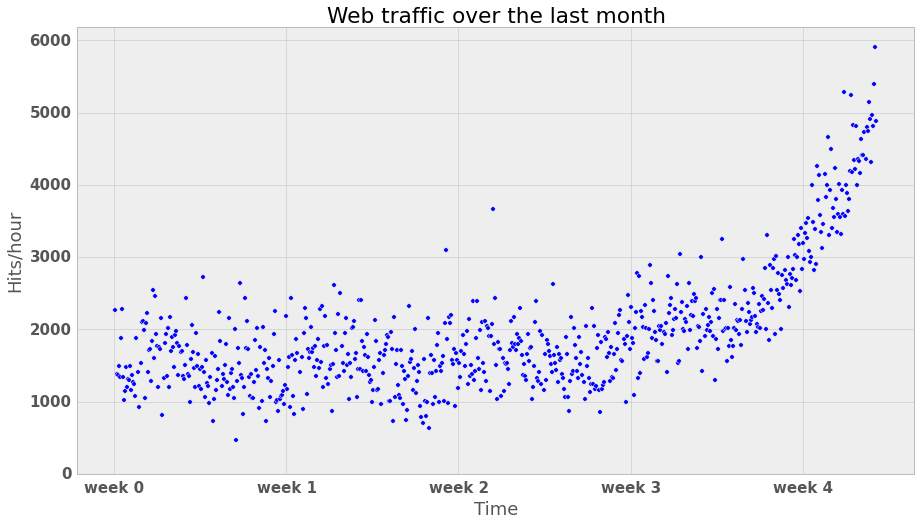

In [11]:
data_pd[:10]

x = data[:, 0]
y = data[:, 1]
print ""
print "Number of invalid entries:", sp.sum(sp.isnan(y))
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]
print"Number of invalid entries after removing them:", sp.sum(sp.isnan(y))
print ""

def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    plt.clf()
    plt.scatter(x, y, s=20)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])

    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)
    

def error(f, x, y):
    return sp.sum((f(x) - y) ** 2)

# first look at the data
plot_models(x, y, None, os.path.join("..", "traffic_raw_data.png"))

In [10]:
#data_pd[:5]

In [7]:
fixed_df = pd.read_csv(os.path.join(data_dir,'web_traffic.tsv'), sep='\t', encoding='latin1', dayfirst=True)
fixed_df[:3]
#fixed_df = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')



,1,2272
0,2,NaN
1,3,1386
2,4,1365


Model parameters: [   2.59619213  989.02487106]
Error of the model: [  3.17389767e+08]
Errors for the complete data set:
Error d=1: 317389767.339778
Error d=2: 179983507.878179
Error d=3: 139350144.031725
Error d=10: 121942326.363459
Error d=53: 109452412.139452


/Users/Ahmed/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


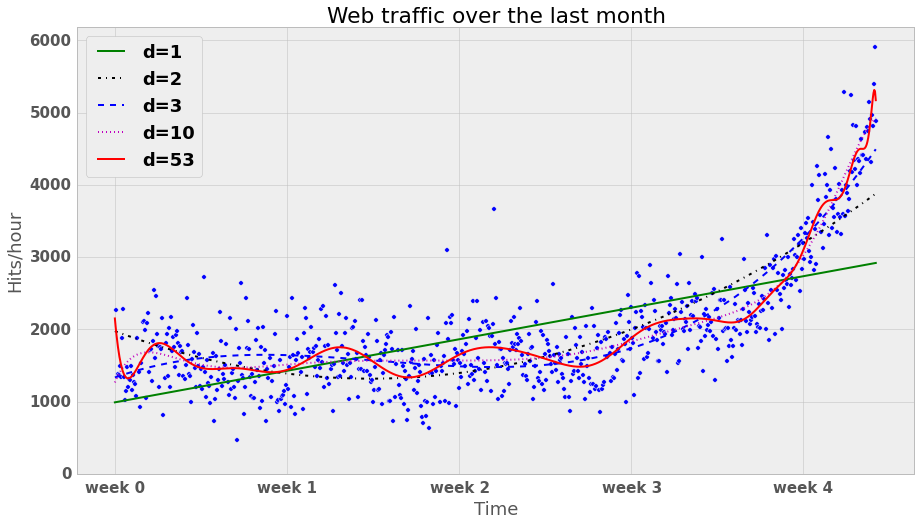

In [87]:
# create and plot models
fp1, res, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)
print "Model parameters: %s" % fp1
print "Error of the model:", res 

f1 = sp.poly1d(fp1)
f2 = sp.poly1d(sp.polyfit(x, y, 2))
f3 = sp.poly1d(sp.polyfit(x, y, 3))
f10 = sp.poly1d(sp.polyfit(x, y, 10))
f100 = sp.poly1d(sp.polyfit(x, y, 100))

print("Errors for the complete data set:")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))

plot_models(x, y, [f100], os.path.join("..", "1400_01_02.png"))

plot_models(x, y, [f1, f2], os.path.join("..", "1400_01_03.png"))
plot_models(
    x, y, [f1, f2, f3, f10, f100], os.path.join("..", "1400_01_04.png"))

Errors for only the time after inflection point
Error d=1: 145045835.134473
Error d=2: 61116348.809621
Error d=3: 33214248.905597
Error d=10: 21611594.264480
Error d=53: 18656110.722135
Error at inflection point = 132950348.197616


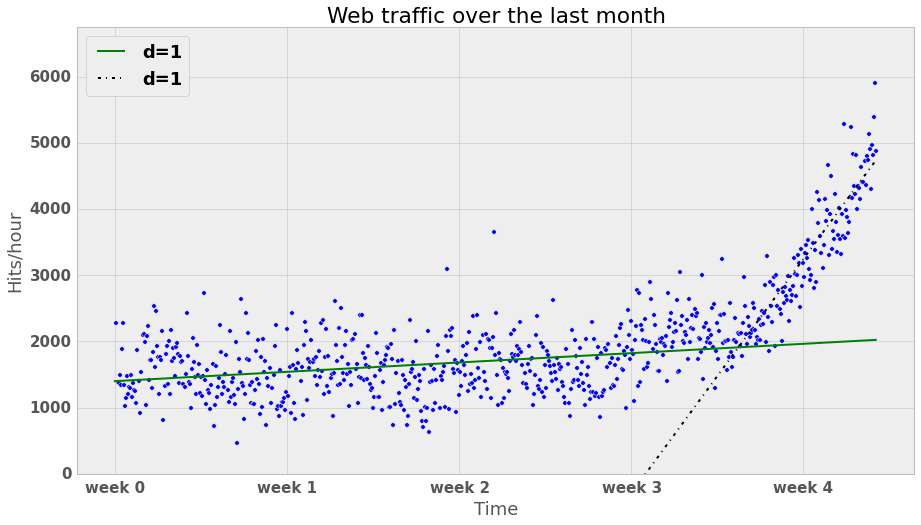

In [95]:
# fit and plot a model using the knowledge about inflection point, the inflection is very clear 
# after week 3. The complex model we used at higher orders is actually carring noise with it, not good.
# Divide the data into two sets, namely after the inflection point appears before the 4th week.

inflection = 3.5 * 7 * 24  # inflection point in hours
xa = x[:inflection] # x-data before the inflrction point
ya = y[:inflection] # y-data before the inflection point
xb = x[inflection:] # x-data after the inflrction point
yb = y[inflection:] # y-data after the inflrction point

fa = sp.poly1d(sp.polyfit(xa, ya, 1)) # training before the inflection 
fb = sp.poly1d(sp.polyfit(xb, yb, 1)) # training after the inflection


print("Errors for only the time after inflection point")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

print("Error at inflection point = %f" % (error(fa, xa, ya) + error(fb, xb, yb)))

plot_models(x, y, [fa, fb], os.path.join("..", "1400_01_05.png"))

Trained only on data after inflection point
Errors for only the time after inflection point
Error d=1: 22143941.107618
Error d=2: 19768846.989176
Error d=3: 19766452.361027
Error d=10: 18949296.781181
Error d=53: 18300767.847085


/Users/Ahmed/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/Ahmed/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


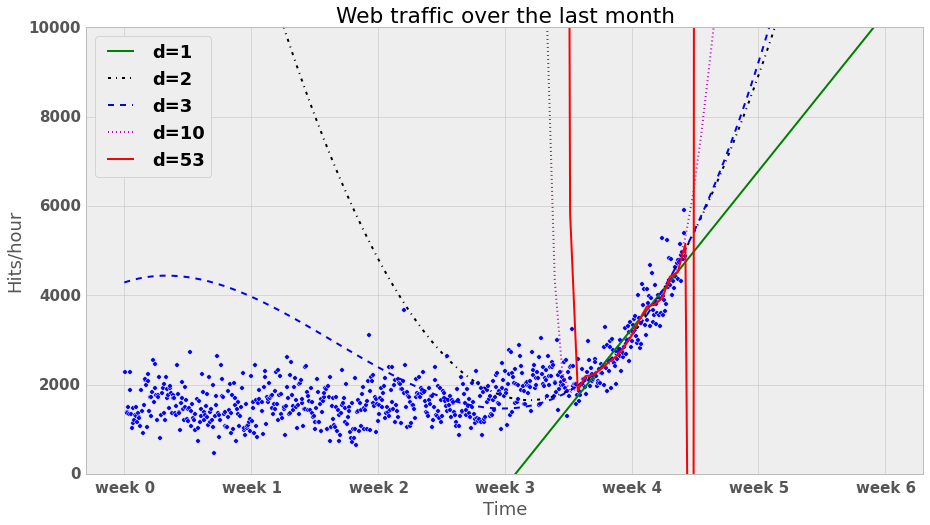

In [98]:
print("Trained only on data after inflection point")
fb1 = fb
fb2 = sp.poly1d(sp.polyfit(xb, yb, 2))
fb3 = sp.poly1d(sp.polyfit(xb, yb, 3))
fb10 = sp.poly1d(sp.polyfit(xb, yb, 10))
fb100 = sp.poly1d(sp.polyfit(xb, yb, 100))

print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

plot_models(
    x, y, [fb1, fb2, fb3, fb10, fb100], os.path.join("..", "1400_01_07.png"),
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

Test errors for only the time after inflection point
Error d=1: 5649849.026626
Error d=2: 5577400.512861
Error d=3: 5592518.667183
Error d=10: 7619253.113259
Error d=53: 9942897.128530


/Users/Ahmed/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/Ahmed/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


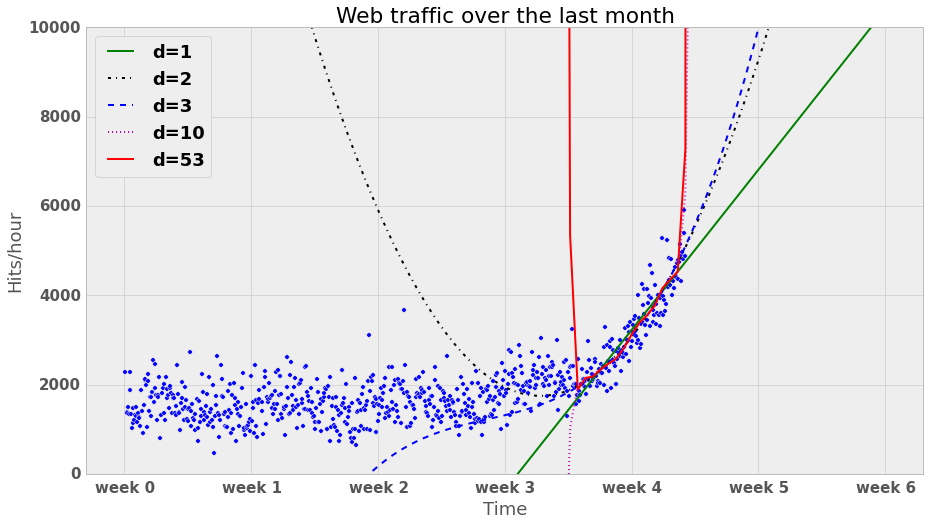

In [127]:
# Removing some data and train on the remaining data. 
#Then use the separated data to calculate the error
# Gives more realistic picture of how the model will behave in the future

frac = 0.3
split_idx = int(frac * len(xb))

shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])

fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(sp.polyfit(xb[train], yb[train], 100))

print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

plot_models(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100], os.path.join("..",
                                                          "1400_01_08.png"),
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

# I noticed that every time we run the training one of the models d2 and d3 wins with the 
#lowest value of error. That is because of the random permutation process happening early.

In [128]:
from scipy.optimize import fsolve
print(fbt2)
print(fbt2 - 100000)
reached_max = fsolve(fbt2 - 100000, 800) / (7 * 24)
print("100,000 hits/hour expected to happen at week %f" % reached_max[0])

         2
0.09011 x - 99.32 x + 2.911e+04
         2
0.09011 x - 99.32 x - 7.089e+04
100,000 hits/hour expected at week 9.496066


In [129]:
arr = sp.arange(9).reshape((3, 3))
print arr
print sp.random.permutation(arr)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[3 4 5]
 [6 7 8]
 [0 1 2]]


In [124]:
arry = sp.arange(10)
c = len(arry)/2
print arry[c:]

[5 6 7 8 9]


In [135]:
import numpy as np
xdd = np.array([[[1],[2],[3]], [[4],[5],[6]]])
print xdd
xdd.shape

[[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]]


(2, 3, 1)

In [148]:
np.c_[.5, 1].T

array([[ 0.5],
       [ 1. ]])